In [4]:
import pandas as pd
train_df = pd.read_csv("train.csv", encoding="utf-8")
test_df = pd.read_csv("test.csv", encoding="utf-8")
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
train_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
test_df.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [7]:
med = train_df.median()
med

PassengerId    446.0000
Survived         0.0000
Pclass           3.0000
Age             28.0000
SibSp            0.0000
Parch            0.0000
Fare            14.4542
dtype: float64

In [8]:
# 填完數值類型的缺失值(train)
train_df = train_df.fillna(med)
train_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
# 填完數值類型的缺失值(test)
# 記得 別重新算一次, 你應該用訓練資料的值來填寫
test_df = test_df.fillna(med)
test_df.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [14]:
# 補缺失值(類別)
most = train_df["Embarked"].value_counts().idxmax()
train_df["Embarked"] = train_df["Embarked"].fillna(most)
test_df["Embarked"] = test_df["Embarked"].fillna(most)
train_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [0]:
# Step2. 類別型態又不能偷懶的記得One-Hot Encoding
train_df = pd.get_dummies(train_df, columns=["Sex", "Embarked"])
test_df = pd.get_dummies(test_df, columns=["Sex", "Embarked"])

In [22]:
# 名字, Test: 先學會一格的轉換
"Braund, Mr. Owen Harris".split(",")[-1].split(".")[0].replace(" ", "")

'Mr'

In [24]:
# Apply: 統計每一個值出現次數
def namecut(s):
    return s.split(",")[-1].split(".")[0].replace(" ", "")
train_df["Name"].apply(namecut).value_counts()

Mr             517
Miss           182
Mrs            125
Master          40
Dr               7
Rev              6
Major            2
Mlle             2
Col              2
Lady             1
Sir              1
Capt             1
Mme              1
Jonkheer         1
Ms               1
theCountess      1
Don              1
Name: Name, dtype: int64

In [0]:
# 真的完成轉換
def namecut(s):
    reserved = ["Mr", "Mrs", "Miss", "Master"]
    mid = s.split(",")[-1].split(".")[0].replace(" ", "")
    if mid in reserved:
        return mid
    else:
        return "Drop"
train_df["Name"] = train_df["Name"].apply(namecut)
test_df["Name"] = test_df["Name"].apply(namecut)

In [0]:
train_df = pd.get_dummies(train_df, columns=["Name"])
test_df = pd.get_dummies(test_df, columns=["Name"])

In [0]:
train_df = train_df.drop(["PassengerId", "Ticket", "Cabin", "Name_Drop"],axis=1)
train_df

In [0]:
test_df = test_df.drop(["Ticket", "Cabin", "Name_Drop"],axis=1)
test_df

In [0]:
# 把答案和題目分開
x_train = train_df.drop(["Survived"], axis=1)
y_train = train_df["Survived"]

In [0]:
# 因為等一下要上傳答案 所以把id留下來
x_test = test_df.drop(["PassengerId"], axis=1)
test_id = test_df["PassengerId"]

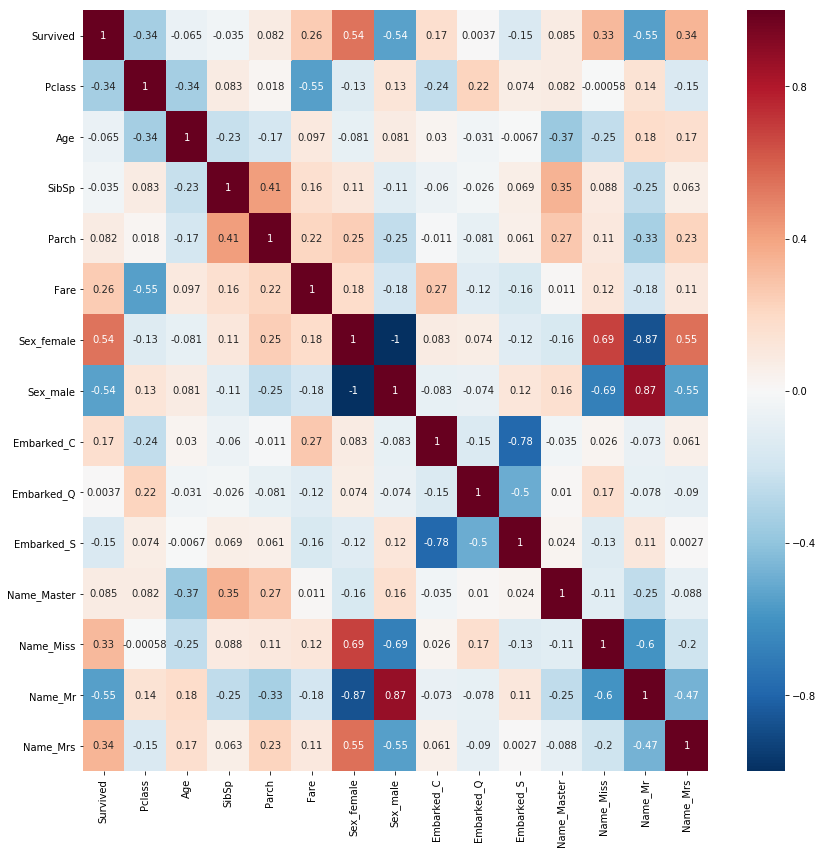

In [47]:
# https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.figure(figsize=(14, 14))
sns.heatmap(train_df.corr(),
      annot=True,
      cmap="RdBu_r")